In [1]:
#default_exp PracticalDeepLearning.Lesson2.CourseWork

In [2]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Lesson 2
> Downloading your own dataset to train with fastai.

# Downloading Images from Google Images

Sometimes you  will want to make your own dataset, which could come in various forms. Sometimes it will involve parsing sites like wikipedia or google images. In this class we are given a bit of javascript code that can be run in the navegator console to download images we look for in Google. To run this you can open your console from f12 and copy it.
```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```
> Note: It is important not to copy random javascript code into your navegator, as this could be insecure.

# Setting up the data

In [3]:
from fastai2.vision.all import *

In [4]:
folders = ['Forest', 'Parks']
files = ['Forest.csv', 'Parks.csv']
path = Path('data/downloads')
if not path.exists():
    for folder,file in zip(folders, files):
        dest = path/folder
        dest.mkdir(parents=True, exist_ok=True)

        download_images(dest, path/file, max_pics=200)

In [5]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms())

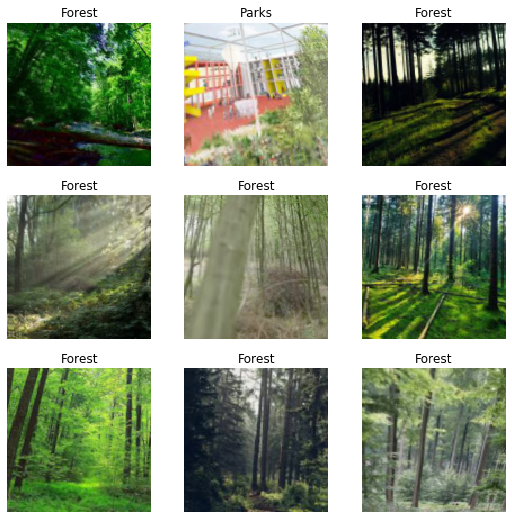

In [6]:
dls = data.dataloaders(path, bs=32)

dls.show_batch()

# Training with auto learner rate setting

In [7]:
learner = Learner(dls, resnet34(pretrained=True), metrics=accuracy)

learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,8.158390,19.656233,0.229167,00:02
1,4.494900,81.202538,0.312500,00:01
2,2.964514,29.558609,0.645833,00:01
3,2.239865,6.290517,0.916667,00:01


(0.00014454397605732084, 3.019951861915615e-07)

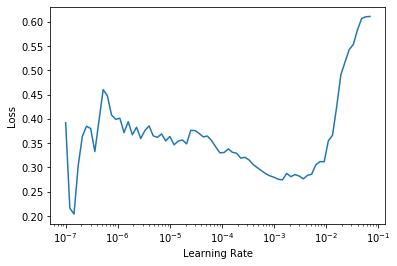

In [9]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.294372,3.237252,0.937500,00:01
1,0.393473,2.307117,0.937500,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.529136,1.858039,0.958333,00:01
1,0.548877,1.783849,0.958333,00:01


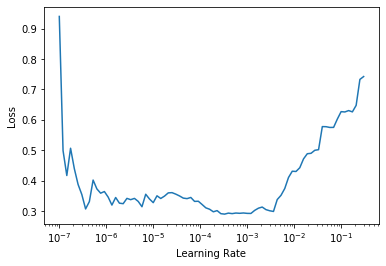

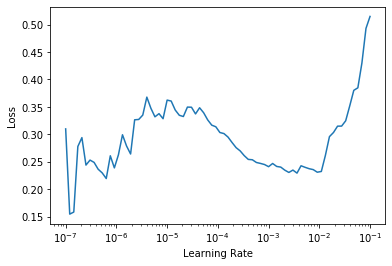

In [11]:
rec_lr = (1,1)
while max(rec_lr) >= 3e-5:
    rec_lr = learner.lr_find()
    learner.fit_one_cycle(2, lr_max=slice(*rec_lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.436472,1.693391,0.958333,00:01
1,0.438489,1.612336,0.958333,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.380171,1.601153,0.958333,00:01
1,0.451791,1.661196,0.958333,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.477280,1.607295,0.958333,00:01
1,0.409760,1.622748,0.958333,00:01


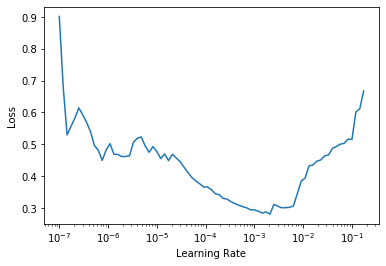

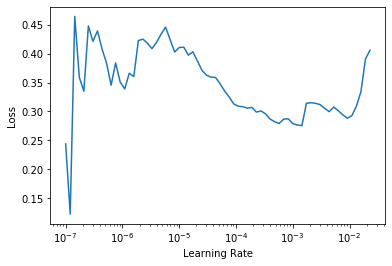

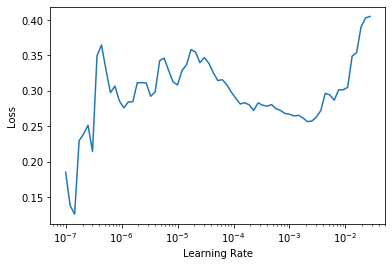

In [12]:
learner.unfreeze()
rec_lr = (1,1)
while min(rec_lr) >= 3e-7:
    rec_lr = learner.lr_find()
    learner.fit_one_cycle(2, lr_max=slice(*rec_lr))

# Seeing results and predicting image

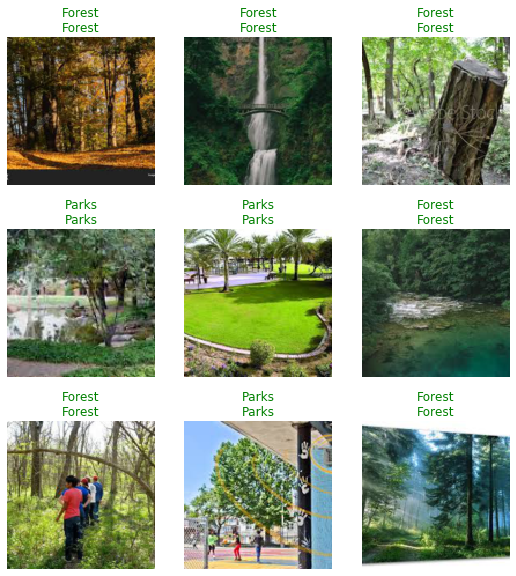

In [14]:
learner.show_results()

In [17]:
interp = ClassificationInterpretation.from_learner(learner)

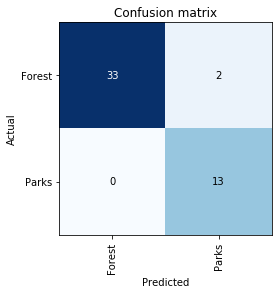

In [18]:
interp.plot_confusion_matrix()

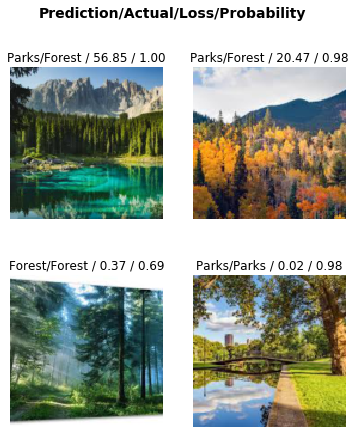

In [22]:
interp.plot_top_losses(4)

In [24]:
learner.predict??